In [205]:
import pandas as pd
import numpy as np

# loading the dataset
df = pd.read_csv('Alternative_Fueling_Stations.csv')

df.head()

/tmp/ipykernel_81759/1804779355.py:5: DtypeWarning: Columns (0,13,15,29,32,34,35,38,43,47,52,53,54,56,57,60,61,62,63,64,67,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Alternative_Fueling_Stations.csv')


,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
0,1,private,NaN,NaN,NaN,10/11/2024 12:00:00 AM,NaN,CNG,Private,17.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,4/14/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,12/10/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706


In [206]:
df.columns

Index(['OBJECTID', 'access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'restricted_access', 'status_code', 'funding_sources', 'facility_type',
       'station_name', 'station_phone', 'updated_at', 'geocode_status',
       'latitude', 'longitude', 'city', 'country', 'intersection_directions',
       'plus4', 'state', 'street_address', 'zip', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_has_rng', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'ev_workplace_charging',


## 1. Data cleaning

### a. Filtering for only ev's

In [207]:
df['fuel_type_code'].unique()

array(['CNG', 'E85', 'ELEC', 'LNG', 'LPG', 'BD', 'HY', 'RD', nan],
      dtype=object)

My main focus is on the evs so i filter the dataset to only exclude the other types.

In [208]:
df = df[df['fuel_type_code'] == 'ELEC']
df.head()

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
125,126,private,Fleet use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1517.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.387971,34.248319
126,127,public,5:30am-9pm; pay lot,NaN,NaN,1/10/2023 12:00:00 AM,NaN,ELEC,Public,1523.0,...,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,-118.271387,34.040539
127,128,private,For fleet and employee use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1525.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.248589,34.059133
128,129,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1531.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.096665,33.759802
129,130,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1552.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.265628,33.770508


### b. Missing values

In [209]:
missing_series = df.isna().sum().sort_values(ascending=False) / len(df) * 100
missing_series

e85_other_ethanol_blends     100.0
cng_vehicle_class            100.0
rd_blends                    100.0
rd_blended_with_biodiesel    100.0
ng_psi                       100.0
                             ...  
latitude                       0.0
longitude                      0.0
country                        0.0
state                          0.0
OBJECTID                       0.0
Length: 80, dtype: float64

After filtering, many columns have missing values. So i chose a threshhold of 20% and deleted the other columns

In [210]:
for index, value in missing_series.items():
    # threshold is 20% for missing values
    if value >= 20:
        df.drop(index, axis=1, inplace=True)

df.isna().sum()

OBJECTID                          0
access_code                       0
access_days_time               8095
date_last_confirmed             107
fuel_type_code                    0
groups_with_access_code           0
id                                0
open_date                       452
status_code                       0
station_name                      1
station_phone                  4219
updated_at                        0
geocode_status                    4
latitude                          0
longitude                         0
city                              3
country                           0
state                             0
street_address                   32
zip                            3685
ev_connector_types             3723
ev_level2_evse_num            15633
ev_network                     3702
ev_network_web                13407
ev_workplace_charging          3710
groups_with_access_code_fr     3685
x                              3685
y                           

There are still some missing values, we now explore more to figure out how to handle the missing values and also avoid losing alot of information.

In [211]:
df.head(20)

,OBJECTID,access_code,access_days_time,date_last_confirmed,fuel_type_code,groups_with_access_code,id,open_date,status_code,station_name,...,street_address,zip,ev_connector_types,ev_level2_evse_num,ev_network,ev_network_web,ev_workplace_charging,groups_with_access_code_fr,x,y
125,126,private,Fleet use only,9/14/2023 12:00:00 AM,ELEC,Private,1517.0,10/15/1999 12:00:00 AM,E,LADWP - Truesdale Center,...,11797 Truesdale St,91352,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,https://www.shell.us/motorist/electric-vehicle...,1.0,Privé,-118.387971,34.248319
126,127,public,5:30am-9pm; pay lot,1/10/2023 12:00:00 AM,ELEC,Public,1523.0,8/30/1995 12:00:00 AM,E,Los Angeles Convention Center,...,1201 S Figueroa St,90015,"[""""J1772""""]",7.0,Non-Networked,NaN,0.0,Public,-118.271387,34.040539
127,128,private,For fleet and employee use only,9/14/2023 12:00:00 AM,ELEC,Private,1525.0,10/15/1999 12:00:00 AM,E,LADWP - John Ferraro Building,...,111 N Hope St,90012,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,NaN,1.0,Privé,-118.248589,34.059133
128,129,private,Fleet use only,1/9/2024 12:00:00 AM,ELEC,Private,1531.0,5/1/2018 12:00:00 AM,E,LADWP - Haynes Power Plant,...,6801 E 2nd St,90803,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,NaN,1.0,Privé,-118.096665,33.759802
129,130,private,Fleet use only,1/9/2024 12:00:00 AM,ELEC,Private,1552.0,10/15/1999 12:00:00 AM,E,LADWP - Harbor Generating Station,...,161 N Island Ave,90744,"[""""J1772""""]",10.0,Non-Networked,NaN,1.0,Privé,-118.265628,33.770508
130,131,private,Fleet use only,1/9/2024 12:00:00 AM,ELEC,Private - Government only,1556.0,1/1/2016 12:00:00 AM,E,LADWP - Sylmar West,...,13201 Sepulveda Blvd,91342,"[""""J1772""""]",2.0,Non-Networked,NaN,0.0,Privé - Réservé au gouvernement,-118.480505,34.303090
131,132,private,Fleet and employee use only,1/9/2024 12:00:00 AM,ELEC,Private,1572.0,10/15/1999 12:00:00 AM,E,LADWP - EV Service Center,...,1630 N Main St,90012,"[""CHADEMO"",""J1772""]",46.0,Non-Networked,NaN,1.0,Privé,-118.227605,34.066801
132,133,private,Fleet use only,1/9/2024 12:00:00 AM,ELEC,Private,1573.0,4/1/2019 12:00:00 AM,E,LADWP - Fairfax Center,...,2311 S Fairfax Ave,90016,"[""""J1772""""]",13.0,Non-Networked,NaN,0.0,Privé,-118.368841,34.036777
133,134,private,Fleet use only,9/14/2023 12:00:00 AM,ELEC,Private,1589.0,10/15/1999 12:00:00 AM,E,LADWP - Palmetto Center,...,1212 Palmetto St,90013,"[""""J1772""""]",27.0,Non-Networked,NaN,1.0,Privé,-118.236065,34.039736
136,137,public,24 hours daily,8/15/2024 12:00:00 AM,ELEC,Public,6355.0,7/30/1997 12:00:00 AM,E,Scripps Green Hospital,...,10666 N Torrey Pines Rd,92037,"[""""J1772""""]",1.0,Non-Networked,NaN,0.0,Public,-117.243000,32.899470


In [212]:
df.columns

Index(['OBJECTID', 'access_code', 'access_days_time', 'date_last_confirmed',
       'fuel_type_code', 'groups_with_access_code', 'id', 'open_date',
       'status_code', 'station_name', 'station_phone', 'updated_at',
       'geocode_status', 'latitude', 'longitude', 'city', 'country', 'state',
       'street_address', 'zip', 'ev_connector_types', 'ev_level2_evse_num',
       'ev_network', 'ev_network_web', 'ev_workplace_charging',
       'groups_with_access_code_fr', 'x', 'y'],
      dtype='object')

Some of the columns don't provide important information for our project so we drop them.

In [213]:
# dropping some columns
if 'OBJECTID' in df.columns:
    df.drop([
        'OBJECTID', 
        'id',
        'date_last_confirmed',
        'station_name',
        'street_address',
        'zip',
        'ev_network_web',
        'station_phone'],
        inplace=True, axis=1)

df

,access_code,access_days_time,fuel_type_code,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,country,state,ev_connector_types,ev_level2_evse_num,ev_network,ev_workplace_charging,groups_with_access_code_fr,x,y
125,private,Fleet use only,ELEC,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,1.0,Privé,-118.387971,34.248319
126,public,5:30am-9pm; pay lot,ELEC,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,CA,"[""""J1772""""]",7.0,Non-Networked,0.0,Public,-118.271387,34.040539
127,private,For fleet and employee use only,ELEC,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,1.0,Privé,-118.248589,34.059133
128,private,Fleet use only,ELEC,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,1.0,Privé,-118.096665,33.759802
129,private,Fleet use only,ELEC,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,US,CA,"[""""J1772""""]",10.0,Non-Networked,1.0,Privé,-118.265628,33.770508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,public,24 hours daily,ELEC,Public,2/9/2025 12:00:00 AM,E,2/10/2025 2:47:13 AM,GPS,33.021393,-96.987131,Lewisville,US,TX,"[""""J1772""""]",1.0,ChargePoint Network,0.0,Public,-96.987131,33.021393
97878,public,NaN,ELEC,Public,2/10/2025 12:00:00 AM,E,2/10/2025 4:39:13 AM,GPS,25.598390,-80.357119,Miami,US,FL,"[""""J1772""""]",7.0,CHARGELAB,0.0,Public,-80.357119,25.598390
97879,public,NaN,ELEC,Public,2/10/2025 12:00:00 AM,E,2/10/2025 4:39:13 AM,GPS,40.674470,-73.995734,Brooklyn,US,NY,"[""""J1772""""]",10.0,CHARGELAB,0.0,Public,-73.995734,40.674470
97880,public,NaN,ELEC,Public,2/10/2025 12:00:00 AM,E,2/10/2025 4:39:14 AM,GPS,37.783456,-122.281623,Alameda,US,CA,"[""""J1772""""]",2.0,CHARGELAB,0.0,Public,-122.281623,37.783456


In [214]:
df = df.dropna(subset=['ev_connector_types', 'ev_workplace_charging'])
df.isna().sum()

access_code                       0
access_days_time               8079
fuel_type_code                    0
groups_with_access_code           0
open_date                       426
status_code                       0
updated_at                        0
geocode_status                    4
latitude                          0
longitude                         0
city                              3
country                           0
state                             0
ev_connector_types                0
ev_level2_evse_num            11921
ev_network                        0
ev_workplace_charging             0
groups_with_access_code_fr        0
x                                 0
y                                 0
dtype: int64

On inspection, the x and y columns give the same info for longitude and latitude. Same case with the groups_with_access_code_fr, it gives the same info as access_code but in french, so we drop these columns.

In [215]:
df = df.drop(['x', 'y', 'groups_with_access_code_fr'], axis=1)


In [216]:
df.fuel_type_code.unique()

array(['ELEC'], dtype=object)

In [217]:
# drop fuel_type_code column because it has only one category for all rows
df = df.drop('fuel_type_code', axis=1)

For the missing values in `ev_level2_evse_num` column, we fill with the averages according to the `groups_with_access_code` categories.

In [218]:
level2_avgs = pd.DataFrame(
    df.groupby('groups_with_access_code')['ev_level2_evse_num'].mean().round(0)
)
level2_avgs

,ev_level2_evse_num
groups_with_access_code,
PLANNED - not yet accessible (Private - Credit card at all times),2.0
PLANNED - not yet accessible (Private),10.0
PLANNED - not yet accessible (Public - Call ahead),4.0
PLANNED - not yet accessible (Public - Credit card at all times),4.0
PLANNED - not yet accessible (Public),6.0
Private,5.0
Private - Call ahead,1.0
Private - Card key at all times,3.0
Private - Credit card after hours,2.0


In [219]:
# helper function to fill the missing values in ev_level2_evse_num
def fill_level2 (row):
    if pd.isna(row['ev_level2_evse_num']):
        return level2_avgs.loc[row['groups_with_access_code']][0]
    return row['ev_level2_evse_num']

In [220]:
df['ev_level2_evse_num'] = df.apply(fill_level2, axis=1)
df.isna().sum()

/tmp/ipykernel_81759/2220250556.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return level2_avgs.loc[row['groups_with_access_code']][0]


access_code                   0
access_days_time           8079
groups_with_access_code       0
open_date                   426
status_code                   0
updated_at                    0
geocode_status                4
latitude                      0
longitude                     0
city                          3
country                       0
state                         0
ev_connector_types            0
ev_level2_evse_num            0
ev_network                    0
ev_workplace_charging         0
dtype: int64

In [221]:
# we now drop the remaining missing values
df.dropna(inplace=True)
df.isna().sum()

access_code                0
access_days_time           0
groups_with_access_code    0
open_date                  0
status_code                0
updated_at                 0
geocode_status             0
latitude                   0
longitude                  0
city                       0
country                    0
state                      0
ev_connector_types         0
ev_level2_evse_num         0
ev_network                 0
ev_workplace_charging      0
dtype: int64

In [222]:
# dropping duplicates
df.drop_duplicates(inplace=True)
df

,access_code,access_days_time,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,country,state,ev_connector_types,ev_level2_evse_num,ev_network,ev_workplace_charging
125,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,1.0
126,public,5:30am-9pm; pay lot,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,CA,"[""""J1772""""]",7.0,Non-Networked,0.0
127,private,For fleet and employee use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,1.0
128,private,Fleet use only,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,1.0
129,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,US,CA,"[""""J1772""""]",10.0,Non-Networked,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97871,public,24 hours daily,Public,2/8/2025 12:00:00 AM,E,2/10/2025 4:29:14 AM,GPS,43.107521,-75.222524,Utica,US,NY,"[""""J1772""""]",10.0,CHARGESMART_EV,0.0
97872,public,24 hours daily,Public,2/8/2025 12:00:00 AM,E,2/10/2025 4:35:35 AM,GPS,32.774669,-115.550470,El Centro,US,CA,"[""""J1772COMBO""""]",2.0,EVGATEWAY,0.0
97873,public,24 hours daily,Public,2/8/2025 12:00:00 AM,E,2/10/2025 4:35:42 AM,GPS,39.070955,-108.581903,Grand Junction,US,CO,"[""""J1772""""]",4.0,EVGATEWAY,0.0
97874,public,24 hours daily,Public,2/8/2025 12:00:00 AM,E,2/10/2025 4:35:43 AM,GPS,39.069009,-108.580296,Grand Junction,US,CO,"[""""J1772COMBO""""]",2.0,EVGATEWAY,0.0


In [223]:
# test code for splitting connector types
connector_types = []
for lis in df.ev_connector_types.values:
    if str(lis)[0] == '[':
        lis = lis[1:-1].split(',')
        lis = [item.strip('"') for item in lis]
    else:
        lis = [lis]
    
    for item in lis:
        if item not in connector_types:
            connector_types.append(item)


connector_types

['CHADEMO', 'J1772', 'J1772COMBO', 'NEMA520', 'NEMA515', 'TESLA', 'NEMA1450']

There are 7 connector types. We create nnew columns for these categories, with a value of 1 if the connector is present and 0 otherwise.

In [224]:
def extract_connectors(row, con_col):
    """Extracts the connector types from the column con_col in the dataframe df."""
    lis = row[con_col]
    if str(lis)[0] == '[':
        lis = lis[1:-1].split(',')
        lis = [item.strip('"') for item in lis]
    else:
        lis = [lis]
    
    return lis

In [225]:
# map to columns to convert from string to list
df['ev_connector_types'] = df.apply(
    extract_connectors, axis=1, con_col='ev_connector_types')
df.head()

,access_code,access_days_time,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,country,state,ev_connector_types,ev_level2_evse_num,ev_network,ev_workplace_charging
125,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,US,CA,"[CHADEMO, J1772, J1772COMBO]",57.0,SHELL_RECHARGE,1.0
126,public,5:30am-9pm; pay lot,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,CA,[J1772],7.0,Non-Networked,0.0
127,private,For fleet and employee use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,CA,"[CHADEMO, J1772, J1772COMBO]",338.0,Non-Networked,1.0
128,private,Fleet use only,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,US,CA,"[CHADEMO, J1772, J1772COMBO]",19.0,Non-Networked,1.0
129,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,US,CA,[J1772],10.0,Non-Networked,1.0


In [226]:
# first create the columns and initialize with 0s
for connector in connector_types:
    connector = "con_" + connector
    df[connector] = 0

# then fill the columns with 1s where the connector is present
for connector in connector_types:
    connector = "con_" + connector
    df[connector] = df.apply(
        lambda row: 1 if connector[4:] in row['ev_connector_types'] else 0, axis=1)
    
# drop the original column
df.drop('ev_connector_types', axis=1, inplace=True)
    
df.head()


,access_code,access_days_time,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,...,ev_level2_evse_num,ev_network,ev_workplace_charging,con_CHADEMO,con_J1772,con_J1772COMBO,con_NEMA520,con_NEMA515,con_TESLA,con_NEMA1450
125,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,...,57.0,SHELL_RECHARGE,1.0,1,1,1,0,0,0,0
126,public,5:30am-9pm; pay lot,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,...,7.0,Non-Networked,0.0,0,1,0,0,0,0,0
127,private,For fleet and employee use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,...,338.0,Non-Networked,1.0,1,1,1,0,0,0,0
128,private,Fleet use only,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,...,19.0,Non-Networked,1.0,1,1,1,0,0,0,0
129,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,...,10.0,Non-Networked,1.0,0,1,0,0,0,0,0


### More feature engineering and selection

In [227]:
df.reset_index(drop=True, inplace=True)


In [228]:
df.access_days_time.unique()

array(['Fleet use only', '5:30am-9pm; pay lot',
       'For fleet and employee use only', ...,
       'Mon 8:00am - 7:00pm; Tue 8:00am - 7:00pm; Wed 8:00am - 7:00pm; Thu 8:00am - 7:00pm; Fri 8:00am - 7:00pm; Sat 9:00am - 5:00pm; Sun 12:00am - 12:00am',
       'Mon 7:00am - 11:00pm; Tue 7:00am - 11:00pm; Wed 7:00am - 11:00pm; Thu 7:00am - 11:00pm; Fri 7:00am - 11:00pm; Sat 12:00am - 12:00am; Sun 12:00am - 12:00am',
       'Mon 8:00am - 8:00pm; Tue 8:00am - 8:00pm; Wed 8:00am - 8:00pm; Thu 8:00am - 8:00pm; Fri 8:00am - 8:00pm; Sat 8:00am - 5:00pm'],
      dtype=object)

From the column `access_days_time` we can extract the access days and the duration the station can be accessed.

We first create a function to test how to do this.

In [229]:
import re
from datetime import datetime, timedelta

def extract_day_and_hours_test(text):
    # Regex pattern to match the day and time (7:00am - 9:00pm format)
    pattern = r'(\w{3})\s(\d{1,2}:\d{2}[ap]m\s-\s\d{1,2}:\d{2}[ap]m)'

    # Check for "24 hours daily" pattern
    if re.search(r'24\s*hours\s*daily', text, re.IGNORECASE):
        return {"Day": "daily", "Hours": 24}

    # Search for the pattern in the text
    matches = re.findall(pattern, text)

    if matches:
        # If a match is found, return the day and the available hours
        day, hours = matches[0]
        
        # Extract start and end time from the hours string (e.g., '7:00am - 9:00pm')
        start_time_str, end_time_str = hours.split(' - ')
        
        # Convert the time strings to datetime objects
        time_format = '%I:%M%p'  # 12-hour format with AM/PM
        start_time = datetime.strptime(start_time_str, time_format)
        end_time = datetime.strptime(end_time_str, time_format)
        
        # If the end time is earlier in the day than the start time, assume it's the next day
        if end_time < start_time:
            end_time = datetime.strptime(end_time_str, time_format) + timedelta(days=1)
        
        # Calculate the duration in hours
        duration = (end_time - start_time).seconds / 3600  # Convert seconds to hours
        
        return {"Day": day, "Hours": duration}
    else:
        # If no match, return the original text
        return text

In [230]:
ans = extract_day_and_hours_test('Tue 8:00am - 8:00pm;')
ans

{'Day': 'Tue', 'Hours': 12.0}

In [231]:
other_categories = []
for text in df.access_days_time.unique():
    if type(extract_day_and_hours_test(text)) == str:
        other_categories.append(text)

print("How many other categories",len(other_categories))
other_categories[:10]

How many other categories 872


['Fleet use only',
 '5:30am-9pm; pay lot',
 'For fleet and employee use only',
 'Fleet and employee use only',
 'Dealership business hours; customer use only',
 '6am-12am daily',
 '8am-4:30pm M-F',
 '8am-5pm daily',
 'Garage business hours; pay lot; Drivers must bring their own J1772 cordset for Level 1 charging',
 '5am-2am daily']

From above output, we notice that there are many categories in the column. Hence we use regex and define some rules to extract the days and duration.

# Time Parsing and Extraction Functions

This cell explains the functionality of the functions used, which are designed to clean, standardize, and extract time-related information from strings. The code includes four main functions:

1. **`clean_time_string`**
2. **`standardize_time`**
3. **`parse_time_range`**
4. **`extract_day_and_hours`**

Below is a detailed explanation of each function.

---

## 1. `clean_time_string`

### Purpose
This function cleans and standardizes a time string by removing unnecessary characters and formatting it consistently.

### Input
- `time_str` (str): A string representing a time (e.g., "10:30 AM", "2.00 PM", " 3:00pm ").

### Output
- Returns a cleaned and standardized time string (e.g., "10:30am") or `None` if the input is invalid.

### Key Steps
1. **Input Validation**: Checks if the input is a string. If not, returns `None`.
2. **Cleaning**:
   - Removes leading/trailing spaces.
   - Converts the string to lowercase.
   - Replaces dots (`.`) with colons (`:`) to standardize separators.
   - Removes duplicate colons (e.g., `10::30` → `10:30`).
3. **Return**: Returns the cleaned string.

---

## 2. `standardize_time`

### Purpose
Converts a time string into a standardized format (`HH:MM AM/PM`).

### Input
- `time_str` (str): A time string (e.g., "10:30am", "2:00 PM", "14:00").

### Output
- Returns the time in the format `HH:MM AM/PM` (e.g., "10:30 AM") or `None` if the input is invalid.

### Key Steps
1. **Cleaning**: Calls `clean_time_string` to preprocess the input.
2. **Period Extraction**:
   - Detects and extracts `AM` or `PM` from the string.
   - Defaults to `AM` if no period is specified.
3. **Time Parsing**:
   - Splits the string into hours and minutes using `:` as the delimiter.
   - Handles cases where minutes are missing (defaults to `00`).
4. **Validation**:
   - Ensures hours are within 12-hour format (e.g., `13` → `1`).
   - Ensures minutes are valid (e.g., `60` → `59`).
5. **Formatting**: Returns the time in `HH:MM AM/PM` format.

---

## 3. `parse_time_range`

### Purpose
Parses a time range string (e.g., "10:00 AM - 2:00 PM") and returns the start and end times as `datetime` objects.

### Input
- `time_range` (str): A string representing a time range (e.g., "10:00 AM - 2:00 PM").

### Output
- Returns a tuple of `(start_time, end_time)` as `datetime` objects or `(None, None)` if the input is invalid.

### Key Steps
1. **Input Validation**: Checks if the input is a string. If not, returns `(None, None)`.
2. **Cleaning**: Removes leading/trailing spaces and converts the string to lowercase.
3. **Splitting**:
   - Splits the string into `start_time` and `end_time` using hyphens (`-`, `–`, `—`) as delimiters.
   - If the split does not result in exactly two parts, returns `(None, None)`.
4. **Period Handling**:
   - If `start_time` lacks `AM/PM`, infers it from `end_time`.
5. **Standardization**:
   - Calls `standardize_time` to format both `start_time` and `end_time`.
6. **Datetime Conversion**:
   - Converts the standardized times into `datetime` objects.
   - Handles overnight shifts (e.g., "11:00 PM - 2:00 AM") by adding a day to `end_time`.
7. **Return**: Returns the `(start_time, end_time)` tuple.

---

## 4. `extract_day_and_hours`

### Purpose
Extracts the day type (e.g., "business", "daily", specific day) and operating hours from a text description.

### Input
- `text` (str): A string containing a description of operating hours (e.g., "Open Monday-Friday 9:00 AM - 5:00 PM").

### Output
- Returns a dictionary with two keys:
  - `"Day"`: The type of day (e.g., "business", "daily", "monday").
  - `"Hours"`: The duration of operating hours in hours (e.g., `8`).

### Key Steps
1. **Input Validation**: Checks if the input is a string. If not, returns a default value (`{"Day": "business", "Hours": 8}`).
2. **Pattern Matching**:
   - **24-Hour Operation**: Checks for phrases like "24 hours" or "24/7".
   - **Specific Days**: Matches specific days (e.g., "Monday", "Tue").
   - **Business Patterns**: Matches business-related terms (e.g., "Mon-Fri", "business hours").
3. **Time Range Extraction**:
   - Uses a regex pattern to extract time ranges (e.g., "9:00 AM - 5:00 PM").
   - Calls `parse_time_range` to calculate the duration of the time range.
4. **Return**:
   - If a specific day is found, returns the day and default hours (`8`).
   - If a business pattern is found, returns `{"Day": "business", "Hours": 8}`.
   - If a time range is found, returns `{"Day": "business", "Hours": <duration>}`.
   - Defaults to `{"Day": "business", "Hours": 8}` if no patterns match.

---

## Example Usage

```python
# First import the function
from utils.cleaning import extract_day_and_hours

# Extract day and hours from text
text = "Open Monday-Friday 9:00 AM - 5:00 PM"
print(extract_day_and_hours(text))  # Output: {"Day": "monday", "Hours": 8}

In [232]:
from utils.cleaning import extract_day_and_hours

In [233]:
{obj['Day'] for obj in df['access_days_time'].apply(extract_day_and_hours)}

{'business',
 'daily',
 'friday',
 'monday',
 'saturday',
 'sunday',
 'thursday',
 'tuesday'}

In [234]:
# create new columns for access_days and access_hours
df['access_days'] = df['access_days_time'].apply(
    lambda x: extract_day_and_hours(x)['Day'])
df['access_hours'] = df['access_days_time'].apply(
    lambda x: extract_day_and_hours(x)['Hours'])

# drop the original column
df.drop('access_days_time', axis=1, inplace=True)
df.head()

,access_code,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,country,...,ev_workplace_charging,con_CHADEMO,con_J1772,con_J1772COMBO,con_NEMA520,con_NEMA515,con_TESLA,con_NEMA1450,access_days,access_hours
0,private,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,US,...,1.0,1,1,1,0,0,0,0,business,8.0
1,public,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,...,0.0,0,1,0,0,0,0,0,business,15.5
2,private,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,...,1.0,1,1,1,0,0,0,0,business,8.0
3,private,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,US,...,1.0,1,1,1,0,0,0,0,business,8.0
4,private,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,US,...,1.0,0,1,0,0,0,0,0,business,8.0


In [235]:
df.columns

Index(['access_code', 'groups_with_access_code', 'open_date', 'status_code',
       'updated_at', 'geocode_status', 'latitude', 'longitude', 'city',
       'country', 'state', 'ev_level2_evse_num', 'ev_network',
       'ev_workplace_charging', 'con_CHADEMO', 'con_J1772', 'con_J1772COMBO',
       'con_NEMA520', 'con_NEMA515', 'con_TESLA', 'con_NEMA1450',
       'access_days', 'access_hours'],
      dtype='object')

In [236]:
# dropping some date columns
df = df.drop(['open_date', 'updated_at'], axis=1)
df.head()

,access_code,groups_with_access_code,status_code,geocode_status,latitude,longitude,city,country,state,ev_level2_evse_num,...,ev_workplace_charging,con_CHADEMO,con_J1772,con_J1772COMBO,con_NEMA520,con_NEMA515,con_TESLA,con_NEMA1450,access_days,access_hours
0,private,Private,E,GPS,34.248319,-118.387971,Sun Valley,US,CA,57.0,...,1.0,1,1,1,0,0,0,0,business,8.0
1,public,Public,E,GPS,34.040539,-118.271387,Los Angeles,US,CA,7.0,...,0.0,0,1,0,0,0,0,0,business,15.5
2,private,Private,E,GPS,34.059133,-118.248589,Los Angeles,US,CA,338.0,...,1.0,1,1,1,0,0,0,0,business,8.0
3,private,Private,E,GPS,33.759802,-118.096665,Long Beach,US,CA,19.0,...,1.0,1,1,1,0,0,0,0,business,8.0
4,private,Private,E,200-8,33.770508,-118.265628,Wilmington,US,CA,10.0,...,1.0,0,1,0,0,0,0,0,business,8.0


In [237]:
df.city.unique().size

6696

In [238]:
df.country.unique()

array(['US'], dtype=object)

In [239]:
df.state.unique()

array(['CA', 'VT', 'WA', 'OR', 'IL', 'ID', 'NY', 'WI', 'IA', 'AZ', 'MD',
       'NJ', 'TX', 'SC', 'CT', 'OH', 'WV', 'MO', 'UT', 'KS', 'MA', 'FL',
       'CO', 'MI', 'LA', 'MN', 'NC', 'NH', 'VA', 'TN', 'AL', 'GA', 'HI',
       'PA', 'AR', 'RI', 'OK', 'DC', 'ME', 'KY', 'NE', 'MS', 'SD', 'DE',
       'IN', 'NM', 'MT', 'ND', 'NV', 'WY', 'AK', 'PR'], dtype=object)

In [240]:
df = df.drop(['country', 'city'], axis=1)

# EDA

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
df.groupby('groups_with_access_code').size() / len(df) * 100

groups_with_access_code
PLANNED - not yet accessible (Private)                               0.001366
PLANNED - not yet accessible (Public - Credit card at all times)     0.005464
PLANNED - not yet accessible (Public)                                0.278650
Private                                                              2.761918
Private - Call ahead                                                 0.016391
Private - Card key at all times                                      0.005464
Private - Credit card after hours                                    0.002732
Private - Credit card at all times                                   0.092883
Private - Fleet customers only                                       0.028685
Private - Government only                                            0.487638
Public                                                              83.645677
Public - Call ahead                                                  1.745663
Public - Card key after hours           

For the column `groups_with_access_code`, most of the stations fall into the public category, accounting for about 84%. Given that the information about whether a station is private or public can already be obtained from the `access_code` column, this suggests that the `groups_with_access_code` column provides minimal additional information. Therefore, we can consider dropping it to reduce complexity during modeling.

In [243]:
df.drop('groups_with_access_code', axis=1, inplace=True)

In [244]:
df.columns

Index(['access_code', 'status_code', 'geocode_status', 'latitude', 'longitude',
       'state', 'ev_level2_evse_num', 'ev_network', 'ev_workplace_charging',
       'con_CHADEMO', 'con_J1772', 'con_J1772COMBO', 'con_NEMA520',
       'con_NEMA515', 'con_TESLA', 'con_NEMA1450', 'access_days',
       'access_hours'],
      dtype='object')

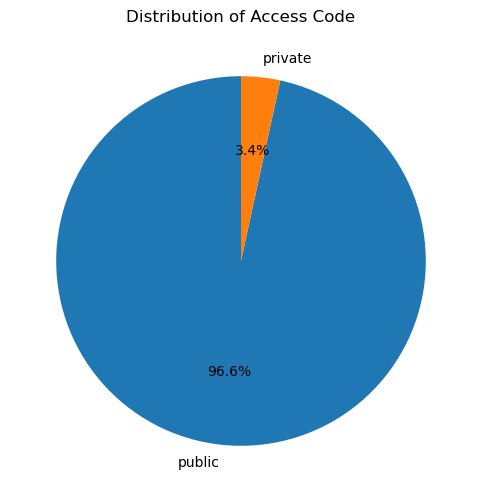

In [245]:
# plot a pie chart to show the distribution aof the access_code column
plt.figure(figsize=(10, 6))

df['access_code'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Access Code')
plt.ylabel('')
plt.show()


Most of the stations are public(about97%).

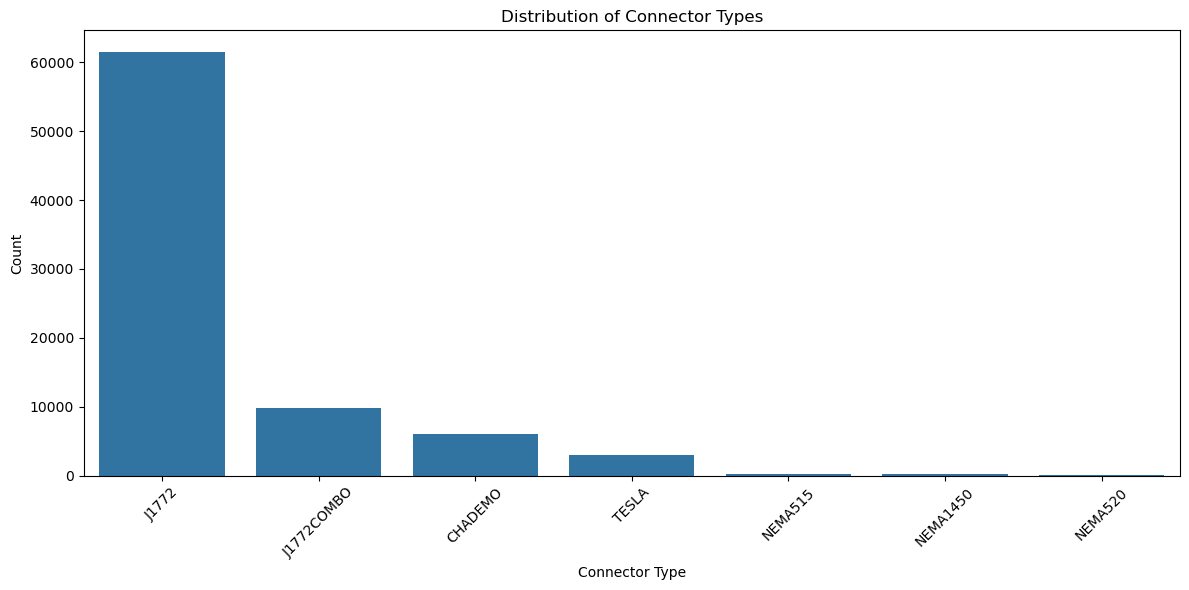

In [246]:
connector_df = df.loc[:, [col for col in df.columns if col.startswith('con_')]]

# plotting the distribution of the connector types
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=connector_df.sum().sort_values(ascending=False).reset_index(),
            x='index', y=0, ax=ax)
ax.set_title('Distribution of Connector Types')
ax.set_ylabel('Count')
ax.set_xlabel('Connector Type')
ax.set_xticks(range(len(connector_df.columns)))
ax.set_xticklabels(
    [col[4:] for col in connector_df.sum().sort_values(ascending=False).index], rotation=45)
plt.tight_layout()
plt.show();

In [247]:
connector_df.sum() / len(df) * 100

con_CHADEMO        8.233848
con_J1772         84.123754
con_J1772COMBO    13.461276
con_NEMA520        0.193963
con_NEMA515        0.336020
con_TESLA          4.081410
con_NEMA1450       0.204890
dtype: float64

J1772 connector is the most common connector type present in about 84% of the stations.